### 로지스틱 회귀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/LogisticRegressionData.csv')
df

,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0
5,3.2,0
6,3.9,0
7,4.4,1
8,4.5,0
9,5.0,1


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=int64))

In [5]:
X.shape, y.shape

((20, 1), (20,))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
len(X_train), len(X_test)

(16, 4)

In [8]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
reg.predict([[6], [8], [2]])

array([1, 1, 0], dtype=int64)

In [10]:
reg.predict_proba([[6]])

array([[0.14150735, 0.85849265]])

In [11]:
y_pred = reg.predict(X_test)
y_pred , X_test

(array([1, 0, 1, 1], dtype=int64),
 array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]))

In [12]:
reg.score(X_test, y_test)

0.75

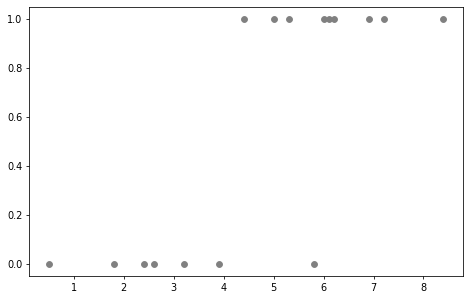

In [13]:
plt.figure(figsize=(8, 5), dpi=70)
plt.scatter(X_train, y_train, color='grey')
plt.show()

In [14]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

C:\Users\kosmo\AppData\Local\Temp\ipykernel_11432\3009068081.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [15]:
# p= 1/ (1+ (e^-y))
# y = mx + b

m = reg.coef_ # 기울기
b = reg.intercept_ # y절편
y = m * X_range + b
P = 1 / (1 + (np.exp(-y)))
P = P.reshape(-1)
P

array([0.01035705, 0.01161247, 0.01301807, 0.0145913 , 0.01635149,
       0.01832008, 0.02052073, 0.02297953, 0.02572521, 0.02878929,
       0.03220626, 0.03601375, 0.04025264, 0.04496719, 0.05020505,
       0.05601722, 0.06245802, 0.06958479, 0.07745757, 0.08613861,
       0.09569165, 0.10618106, 0.11767067, 0.13022241, 0.14389468,
       0.15874043, 0.17480509, 0.19212422, 0.2107211 , 0.23060425,
       0.25176509, 0.27417574, 0.29778732, 0.32252874, 0.34830616,
       0.3750034 , 0.40248315, 0.43058927, 0.45914989, 0.48798142,
       0.51689314, 0.54569221, 0.57418876, 0.60220088, 0.6295591 ,
       0.65611024, 0.68172044, 0.70627722, 0.72969059, 0.75189324,
       0.77283994, 0.79250621, 0.81088652, 0.82799203, 0.84384828,
       0.85849265, 0.871972  , 0.88434036, 0.89565683, 0.90598377,
       0.91538521, 0.92392546, 0.93166808, 0.93867499, 0.9450058 ,
       0.95071738, 0.95586346, 0.96049453, 0.96465764, 0.96839647,
       0.97175136, 0.97475939, 0.97745455, 0.97986786, 0.98202

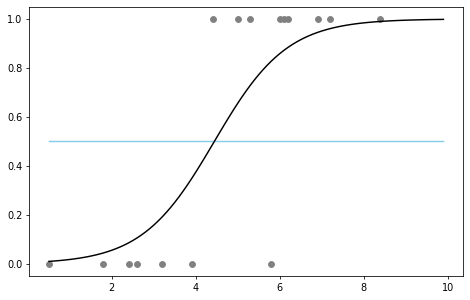

In [16]:
plt.figure(figsize=(8, 5), dpi=70)
plt.scatter(X_train, y_train, color='grey')
plt.plot(X_range, np.full(len(X_range), 0.5), color="skyblue")
plt.plot(X_range, P, color="black")
plt.show()

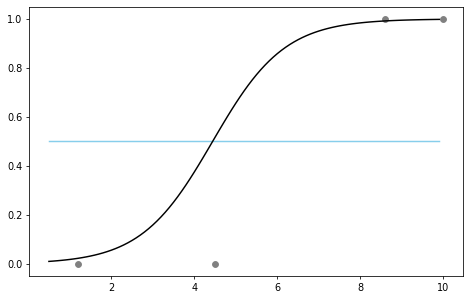

In [17]:
plt.figure(figsize=(8, 5), dpi=70)
plt.scatter(X_test, y_test, color='grey')
plt.plot(X_range, np.full(len(X_range), 0.5), color="skyblue")
plt.plot(X_range, P, color="black")
plt.show()

In [18]:
reg.predict([[4.5]])

array([1], dtype=int64)

In [19]:
def sigmoid(reg, X):
    m = reg.coef_ # 기울기
    b = reg.intercept_ # y절편
    y = m * X + b
    P = 1 / (1 + (np.exp(-y)))
    P = P.reshape(-1)
    return P

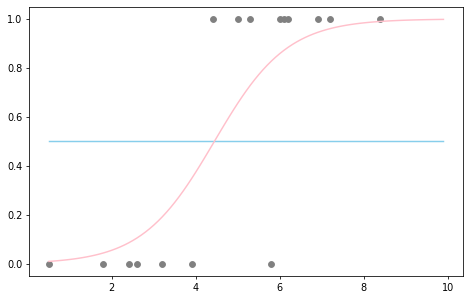

In [23]:
plt.figure(figsize=(8, 5), dpi=70)
plt.scatter(X_train, y_train, color='grey')
plt.plot(X_range, np.full(len(X_range), 0.5), color="skyblue")
plt.plot(X_range, sigmoid(reg, X_range), color="pink")
plt.show()